## WhatAmIDoingHere
### สมาชิกกลุ่ม
1. นายธงไทย รุจิเวชวงษ์ 6310403982
2. นายชัชวาลย์ สามา 6310406272

#### Resouces : 
- https://www.kaggle.com/datasets/swapnilpanda/heart-sound-database  
After rescearch and asking doctors we found that this dataset belong to lung sound not heart sound. Ref: https://www.kaggle.com/code/israaelmorsy/lung-sound-classification/notebook
- https://www.kaggle.com/datasets/vbookshelf/respiratory-sound-database
- https://data.mendeley.com/datasets/jwyy9np4gv/3

In [1]:
from IPython.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import os
import seaborn as sns
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(123)

## If error :
#### No module named 'numba.decorators'
- conda install -c numba numba
- conda install -c conda-forge librosa

#### cannot load library libsndfile64bit.dll 
- pip uninstall soundfile
- pip install soundfile

## Data from Kaggle - 1

 ### Source : https://www.kaggle.com/datasets/vbookshelf/respiratory-sound-database 

In [4]:
audio_dir = 'Respiratory_Sound_Database/audio_and_txt_files'
wav_files = sorted([os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith('.wav')])

In [5]:
# Set the target length for all audio files
target_length = 22050 * 10 

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []

# Iterate over all the audio files
for wav_file in wav_files:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)

# Convert the list to a numpy array and add a channel dimension
X_train = np.array(all_mfccs)
X_train = np.expand_dims(X_train, axis=-1)

# Print the shape of the numpy array
print(X_train.shape)


(920, 20, 431, 1)


In [6]:
# assert False, "Stopping the execution here"

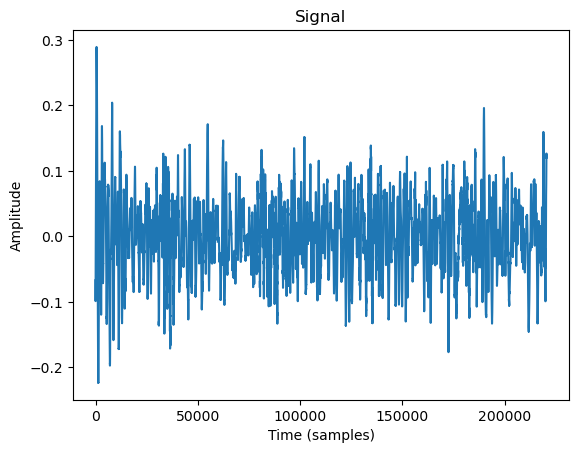

In [7]:
plt.plot(samples);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

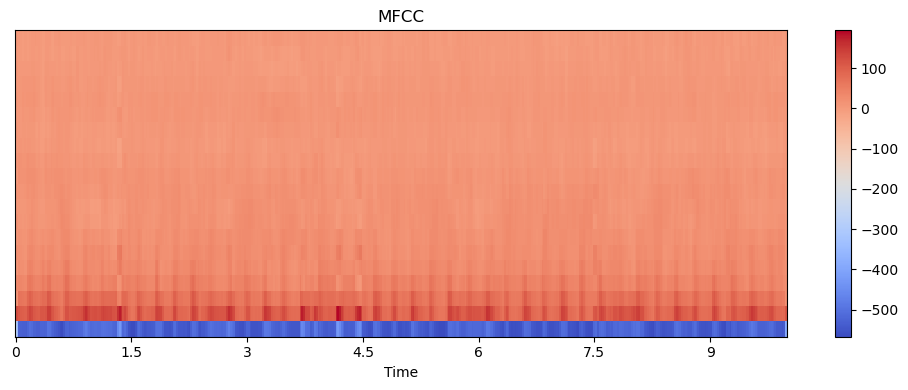

In [8]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(all_mfccs[0], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

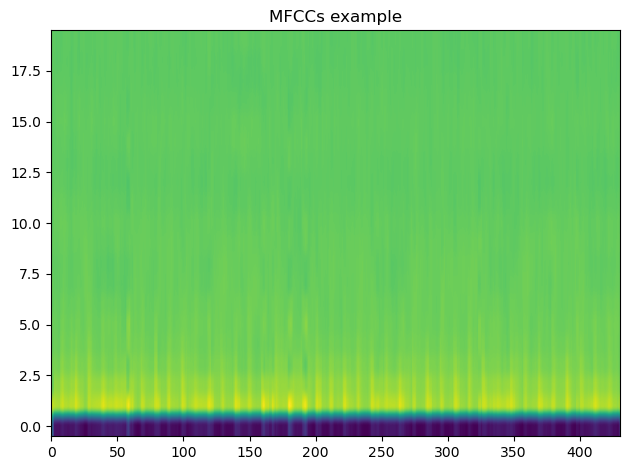

In [9]:
plt.imshow(X_train[0, :, :, 0], aspect='auto', origin='lower')
plt.title('MFCCs example')
plt.tight_layout()
plt.show()


In [10]:
y_train = pd.read_csv("Respiratory_Sound_Database/patient_diagnosis.csv" ,  header=None)
y_train = y_train.rename(columns={0: "id", 1: "type"})
y_train['type'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: type, dtype: int64

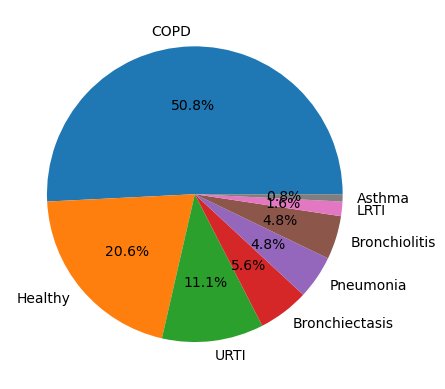

In [11]:
counts =y_train["type"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

In [12]:
y_train.loc[y_train['type'] != 'Healthy', 'type'] = 'Unhealthy'
y_train

,id,type
0,101,Unhealthy
1,102,Healthy
2,103,Unhealthy
3,104,Unhealthy
4,105,Unhealthy
...,...,...
121,222,Unhealthy
122,223,Unhealthy
123,224,Healthy
124,225,Healthy


In [13]:
y_train["type"].value_counts()

Unhealthy    100
Healthy       26
Name: type, dtype: int64

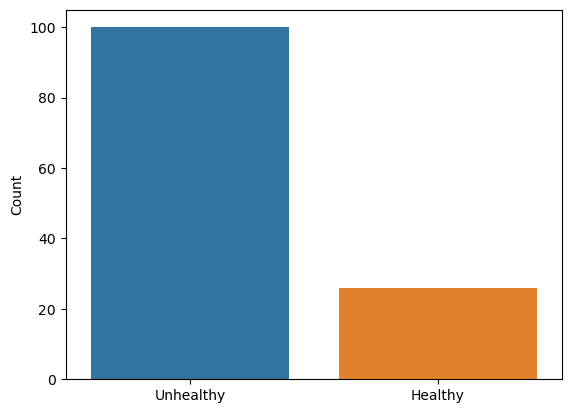

In [14]:
counts =y_train["type"].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

In [15]:
patient_ids = [int(f.split("_")[0]) for f in os.listdir(audio_dir) if f.endswith(".wav")]
patient_ids.sort()
new_y_train = pd.DataFrame({'id': patient_ids})
for i, pid in enumerate(patient_ids):
    match = y_train['id'] == pid
    if match.any():
        new_y_train.at[i, 'type'] = y_train[match]['type'].values[0]
    else:
        new_y_train.at[i, 'type'] = 'Unknown'
new_y_train

,id,type
0,101,Unhealthy
1,101,Unhealthy
2,102,Healthy
3,103,Unhealthy
4,104,Unhealthy
...,...,...
915,224,Healthy
916,225,Healthy
917,226,Unhealthy
918,226,Unhealthy


In [16]:
new_y_train["type"].value_counts()

Unhealthy    885
Healthy       35
Name: type, dtype: int64

In [17]:
y_train = new_y_train
y_train = y_train.drop("id", axis=1)
y_train

,type
0,Unhealthy
1,Unhealthy
2,Healthy
3,Unhealthy
4,Unhealthy
...,...
915,Healthy
916,Healthy
917,Unhealthy
918,Unhealthy


In [18]:
y_train['type'].value_counts()

Unhealthy    885
Healthy       35
Name: type, dtype: int64

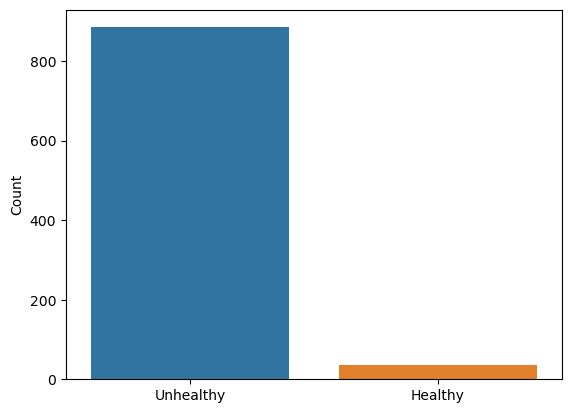

In [19]:
counts =y_train['type'].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

## Data from Kaggle - 2

### Healthy Data

### Source : https://www.kaggle.com/datasets/swapnilpanda/heart-sound-database

In [20]:
# assert False, "Stopping the execution here"

In [21]:
audio_dir_1 = 'heart_sound/train/healthy'
audio_dir_2 = 'heart_sound/val/healthy'

wav_files_1 = sorted([os.path.join(audio_dir_1, f) for f in os.listdir(audio_dir_1) if f.endswith('.wav')])
wav_files_2 = sorted([os.path.join(audio_dir_2, f) for f in os.listdir(audio_dir_2) if f.endswith('.wav')])

In [22]:
directory = audio_dir_1
count = 0

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1

directory = audio_dir_2

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1
print(f"Number of .wav files in directory: {count}")

Number of .wav files in directory: 2725


In [23]:
# Set the target length for all audio files
target_length = 22050 * 10 

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []

# Iterate over all the audio files
for wav_file in wav_files_1 + wav_files_2:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)

# Convert the list to a numpy array and add a channel dimension
X_train_2 = np.array(all_mfccs)
X_train_2 = np.expand_dims(X_train_2, axis=-1)

# Print the shape of the numpy array
print(X_train_2.shape)

(2725, 20, 431, 1)


In [24]:
# new_data = np.ones(X_train.shape)
X_train = np.concatenate([X_train, X_train_2], axis=0)
X_train.shape

(3645, 20, 431, 1)

In [25]:
y_2 = pd.DataFrame({'type': ['Healthy'] * count})
y_2

,type
0,Healthy
1,Healthy
2,Healthy
3,Healthy
4,Healthy
...,...
2720,Healthy
2721,Healthy
2722,Healthy
2723,Healthy


In [26]:
y_train

,type
0,Unhealthy
1,Unhealthy
2,Healthy
3,Unhealthy
4,Unhealthy
...,...
915,Healthy
916,Healthy
917,Unhealthy
918,Unhealthy


In [27]:
y_train = pd.concat([y_train, y_2], ignore_index=False)
y_train.shape

(3645, 1)

### Unhealthy Data

In [28]:
audio_dir_3 = 'heart_sound/train/unhealthy'
audio_dir_4 = 'heart_sound/val/unhealthy'

wav_files_3 = sorted([os.path.join(audio_dir_3, f) for f in os.listdir(audio_dir_3) if f.endswith('.wav')])
wav_files_4 = sorted([os.path.join(audio_dir_4, f) for f in os.listdir(audio_dir_4) if f.endswith('.wav')])

In [29]:
directory = audio_dir_3
count = 0

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1

directory = audio_dir_4

for file in os.listdir(directory):
    if file.endswith(".wav"):
        count += 1
print(f"Number of .wav files in directory: {count}")

Number of .wav files in directory: 816


In [30]:
# Set the target length for all audio files
target_length = 22050 * 10 

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []

# Iterate over all the audio files
for wav_file in wav_files_3 + wav_files_4:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)

# Convert the list to a numpy array and add a channel dimension
X_train_3 = np.array(all_mfccs)
X_train_3 = np.expand_dims(X_train_3, axis=-1)

# Print the shape of the numpy array
print(X_train_3.shape)


(816, 20, 431, 1)


In [31]:
X_train = np.concatenate([X_train, X_train_3], axis=0)
X_train.shape

(4461, 20, 431, 1)

In [32]:
y_3 = pd.DataFrame({'type': ['Unhealthy'] * count})
y_3

,type
0,Unhealthy
1,Unhealthy
2,Unhealthy
3,Unhealthy
4,Unhealthy
...,...
811,Unhealthy
812,Unhealthy
813,Unhealthy
814,Unhealthy


In [33]:
y_train = pd.concat([y_train, y_3], ignore_index=False)
y_train.shape

(4461, 1)

In [34]:
y_train.value_counts()

type     
Healthy      2760
Unhealthy    1701
dtype: int64

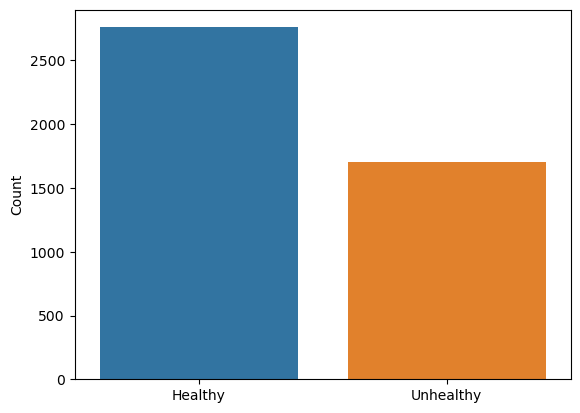

In [35]:
# count the values in the 'Category' column
counts =y_train['type'].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

## Data from data.mendeley - 3

### Source : https://data.mendeley.com/datasets/jwyy9np4gv/3

In [36]:
audio_dir_5 = 'jwyy9np4gv-3/Audio Files'
wav_files_5 = sorted([os.path.join(audio_dir_5, f) for f in os.listdir(audio_dir_5) if f.endswith('.wav')])

In [37]:
# Set the target length for all audio files
target_length = 22050 * 10 

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []

# Iterate over all the audio files
for wav_file in wav_files_5:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)

# Convert the list to a numpy array and add a channel dimension
X_train_4 = np.array(all_mfccs)
X_train_4 = np.expand_dims(X_train_4, axis=-1)

# Print the shape of the numpy array
print(X_train_4.shape)

(336, 20, 431, 1)


In [38]:
# new_data = np.ones(X_train.shape)
X_train = np.concatenate([X_train, X_train_4], axis=0)
X_train.shape

(4797, 20, 431, 1)

In [39]:
data = []

for file in wav_files_5:
    # Split the file name to get the data after "_"
    data_after_underscore = file.split('_')[1]
    # Remove the file extension
    data_after_underscore = data_after_underscore.split('.')[0]
    
    data_after_underscore = data_after_underscore.split(",")[0]
        
    data.append(data_after_underscore)

# Create a DataFrame from the data
y_4= pd.concat([pd.DataFrame(data, columns=['type'])])

# Print the DataFrame
y_4.value_counts()

type                          
N                                 105
Asthma                             51
asthma                             45
heart failure                      45
COPD                               24
pneumonia                          15
Lung Fibrosis                      12
BRON                                9
Heart Failure                       9
Heart Failure + COPD                6
Plueral Effusion                    6
Asthma and lung fibrosis            3
Heart Failure + Lung Fibrosis       3
copd                                3
dtype: int64

In [40]:
y_4.loc[y_4['type'] == 'N', 'type'] = 'Healthy'
y_4.loc[y_4['type'] != 'Healthy', 'type'] = 'Unhealthy'
y_4.value_counts()

type     
Unhealthy    231
Healthy      105
dtype: int64

In [41]:
y_train = pd.concat([y_train, y_4], ignore_index=False)
y_train.shape

(4797, 1)

In [42]:
y_train['type'].value_counts()

Healthy      2865
Unhealthy    1932
Name: type, dtype: int64

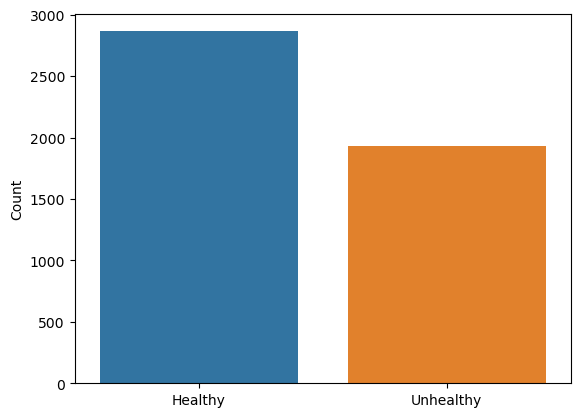

In [43]:
# count the values in the 'Category' column
counts =y_train['type'].value_counts()
sns.barplot(x= counts.index, y= counts.values)
plt.ylabel('Count')
plt.show()

### Stop

In [44]:
# assert False, "Stopping the execution here"

In [45]:
y_train["type"] = np.where(y_train["type"] == "Healthy", 0, 1)

In [46]:
y_train = to_categorical(y_train, 2)
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [47]:
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [48]:
#Reset train Data
X_train = X_train_copy.copy()
y_train = y_train_copy.copy()

In [49]:
def add_noise(data, freq_mask_length=2, time_mask_length=5):

    t = np.random.randint(low=0, high=data.shape[1] - time_mask_length)
    data[:, t:t+time_mask_length] = 0
    
    t = np.random.randint(low=0, high=data.shape[1] - time_mask_length)
    data[:, t:t+time_mask_length] = 0
    
    t = np.random.randint(low=0, high=data.shape[1] - time_mask_length)
    data[:, t:t+time_mask_length] = 0

    t = np.random.randint(low=0, high=data.shape[1] - time_mask_length)
    data[:, t:t+time_mask_length] = 0
    
    return data

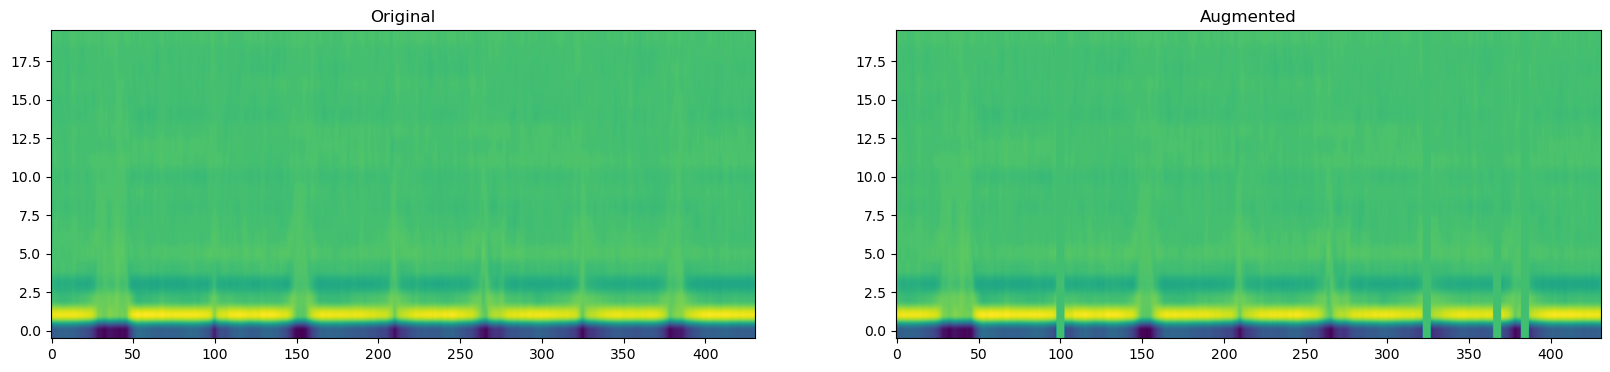

In [50]:
data = X_train[10, :, :, 0].copy()


fig, axs = plt.subplots(1, 2, figsize=(20, 4))

axs[0].imshow(data, aspect='auto', origin='lower')
axs[0].set_title('Original')

axs[1].imshow(add_noise(data), aspect='auto', origin='lower')
axs[1].set_title('Augmented')

plt.show()

In [234]:
indices = np.random.permutation(len(X_train))

# Shuffle arrays using random indices
X_train = X_train[indices]
y_train = y_train[indices]

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.18, stratify=y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)
X_train.shape , y_train.shape , X_val.shape, y_val.shape , X_test.shape, y_test.shape

((3146, 20, 431, 1),
 (3146, 2),
 (787, 20, 431, 1),
 (787, 2),
 (864, 20, 431, 1),
 (864, 2))

In [236]:
X_train_aug = []
y_train_aug = []

for i in range(X_train.shape[0]):
    data = X_train[i, :, :, 0]
    for j in range(1):
        augmented_data = add_noise(data)
        X_train_aug.append(augmented_data[:, :, np.newaxis])
        y_train_aug.append(y_train[i])

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

print("Original X_train shape:", X_train.shape)
print("Augmented X_train shape:", X_train_aug.shape)
print("Original y_train shape:", y_train.shape)
print("Augmented y_train shape:", y_train_aug.shape)

Original X_train shape: (3146, 20, 431, 1)
Augmented X_train shape: (3146, 20, 431, 1)
Original y_train shape: (3146, 2)
Augmented y_train shape: (3146, 2)


In [237]:
# Concatenate original data with augmented data
X_train= np.concatenate((X_train, X_train_aug), axis=0)
y_train = np.concatenate((y_train, y_train_aug), axis=0)

print("Final X_train shape:", X_train.shape)
print("Final y_train shape:", y_train.shape)

Final X_train shape: (6292, 20, 431, 1)
Final y_train shape: (6292, 2)


In [238]:
indices = np.random.permutation(len(X_train))

# Shuffle arrays using random indices
X_train = X_train[indices]
y_train = y_train[indices]

In [239]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report , confusion_matrix ,ConfusionMatrixDisplay

In [261]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 18, 429, 32)       320       
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 427, 32)       9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 8, 213, 32)       0         
 g2D)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 8, 213, 32)        0         
                                                                 
 conv2d_51 (Conv2D)          (None, 6, 211, 64)        18496     
                                                                 
 conv2d_52 (Conv2D)          (None, 4, 209, 64)        36928     
                                                     

In [262]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [263]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
197/197 [==============================] - 24s 121ms/step - loss: 0.9864 - accuracy: 0.7157 - val_loss: 0.4608 - val_accuracy: 0.7738
Epoch 2/5
197/197 [==============================] - 23s 119ms/step - loss: 0.3884 - accuracy: 0.8064 - val_loss: 0.3329 - val_accuracy: 0.8513
Epoch 3/5
197/197 [==============================] - 23s 118ms/step - loss: 0.3349 - accuracy: 0.8419 - val_loss: 0.3478 - val_accuracy: 0.8640
Epoch 4/5
197/197 [==============================] - 24s 119ms/step - loss: 0.3152 - accuracy: 0.8514 - val_loss: 0.2807 - val_accuracy: 0.8742
Epoch 5/5
197/197 [==============================] - 23s 119ms/step - loss: 0.3048 - accuracy: 0.8636 - val_loss: 0.2782 - val_accuracy: 0.8729


In [264]:
score = model.evaluate(X_test,y_test)
print("accuracy : " + str(score[1] * 100) )

27/27 [==============================] - 1s 32ms/step - loss: 0.2734 - accuracy: 0.8692
accuracy : 86.92129850387573


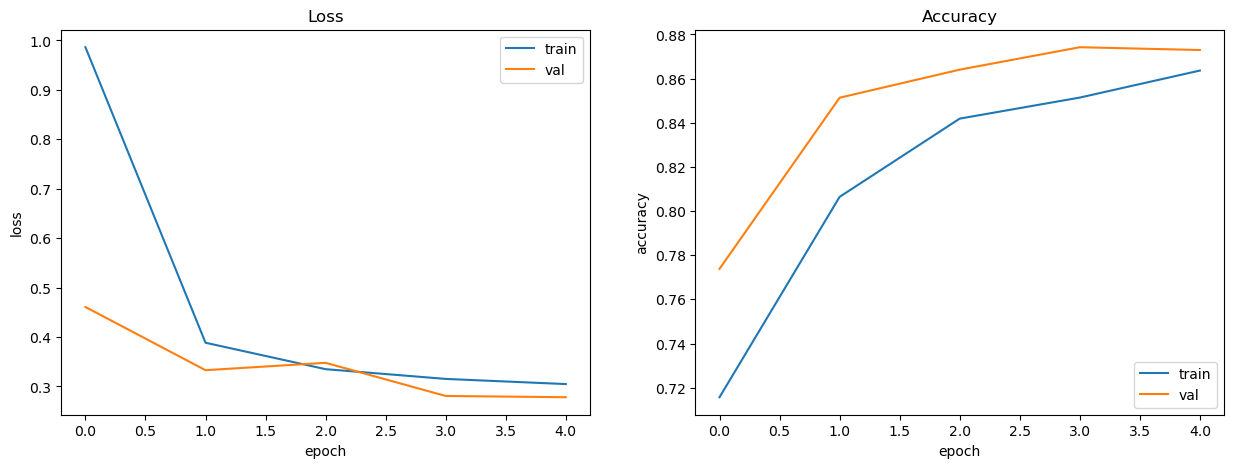

In [265]:
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(15,5))

ax1.set_title('Loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['train', 'val'], loc='upper right')


ax2.set_title('Accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['train', 'val'], loc='lower right')

27/27 [==============================] - 1s 32ms/step


[Text(0.5, 0, 'Predictions'), Text(0, 0.5, 'Actuals')]

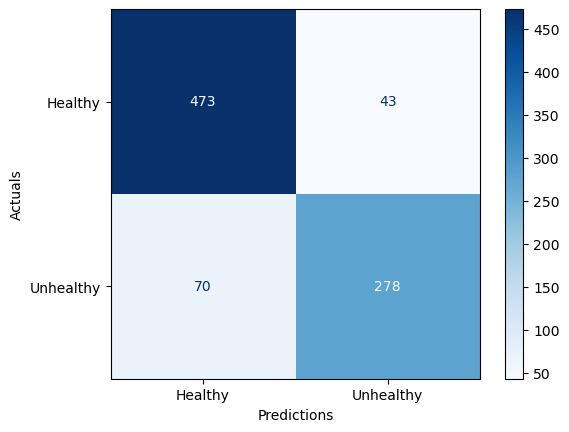

In [266]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
cm = confusion_matrix(y_true, y_pred_classes) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Healthy" , "Unhealthy"])
disp.plot(cmap='Blues')
disp.ax_.set(xlabel='Predictions', ylabel='Actuals')

In [267]:
print(classification_report(y_true , y_pred_classes, target_names=["Healthy" , "Unhealthy"]))

              precision    recall  f1-score   support

     Healthy       0.87      0.92      0.89       516
   Unhealthy       0.87      0.80      0.83       348

    accuracy                           0.87       864
   macro avg       0.87      0.86      0.86       864
weighted avg       0.87      0.87      0.87       864



## Let's try with Data from youtube video

### Source : https://www.youtube.com/playlist?list=PLT8Nd8-_R2iD_-GLfSQGJfsY8ZIs_p3kS

In [268]:
audio_dir_yt_1 = 'LungDataset/Healthy'
audio_dir_yt_2 = 'LungDataset/Unhealthy'

wav_files_yt_1 = sorted([os.path.join(audio_dir_yt_1, f) for f in os.listdir(audio_dir_yt_1) if f.endswith('.wav')])
wav_files_yt_2 = sorted([os.path.join(audio_dir_yt_2, f) for f in os.listdir(audio_dir_yt_2) if f.endswith('.wav')])

In [269]:
# Set the target length for all audio files
target_length = 22050 * 10

# Set the number of Mel frequency bins
n_mels = 128

# List to hold all the mel spectrograms
all_mfccs = []
data_predict = []
i=0
# Iterate over all the audio files
for wav_file in wav_files_yt_1 + wav_files_yt_2:
    # Load the audio file
    samples, sample_rate = librosa.load(wav_file)

    # Trim the audio file to remove the dead air
    samples, _ = librosa.effects.trim(samples)

    # Pad or truncate the audio file to the target length
    if len(samples) < target_length:
        samples = np.pad(samples, (0, target_length - len(samples)), 'constant')
    else:
        samples = samples[:target_length]

    # Compute the Mel spectrogram
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=20, n_mels=n_mels)

    # Append the Mel spectrogram to the list
    all_mfccs.append(mfccs)
#     data_predict.append([wav_file.split("/")[2]])   # MacOs
    data_predict.append([wav_file.split("\\")[1]])   # Windows
    if wav_file in wav_files_yt_1:
        data_predict[i].append("Healthy")
    else : 
        data_predict[i].append("Unhealthy")
    i += 1

# Convert the list to a numpy array and add a channel dimension
X_yt = np.array(all_mfccs)
X_yt = np.expand_dims(X_yt, axis=-1)

# Print the shape of the numpy array
print(X_yt.shape)

(19, 20, 431, 1)


In [270]:
y_pred = model.predict(X_yt)
y_pred_classes = np.argmax(y_pred, axis = 1)
i = 0
for pred in y_pred_classes:
    if pred == 0:
        data_predict[i].append("Healthy")
    else:
        data_predict[i].append("Unhealthy")
    i += 1
data_predict

1/1 [==============================] - 0s 54ms/step


[['NormalBreathSound.wav', 'Healthy', 'Healthy'],
 ['NormalBronchial.wav', 'Healthy', 'Healthy'],
 ['NormalBronchialBreathSounds2.wav', 'Healthy', 'Healthy'],
 ['NormalBronchovesicular.wav', 'Healthy', 'Healthy'],
 ['NormalLungSound.wav', 'Healthy', 'Healthy'],
 ['NormalVesicular.wav', 'Healthy', 'Healthy'],
 ['NormalVesicularBreathSounds.wav', 'Healthy', 'Healthy'],
 ['NormalVesicularBreathSounds2.wav', 'Healthy', 'Unhealthy'],
 ['Asthma.wav', 'Unhealthy', 'Healthy'],
 ['Bronchiectasis.wav', 'Unhealthy', 'Unhealthy'],
 ['COPD.wav', 'Unhealthy', 'Unhealthy'],
 ['CracklesCoarse.wav', 'Unhealthy', 'Unhealthy'],
 ['CracklesFine.wav', 'Unhealthy', 'Unhealthy'],
 ['DiminishedBreathSounds.wav', 'Unhealthy', 'Unhealthy'],
 ['ExpiratoryWheezing.wav', 'Unhealthy', 'Healthy'],
 ['PleuralRub.wav', 'Unhealthy', 'Unhealthy'],
 ['Pneumonia.wav', 'Unhealthy', 'Unhealthy'],
 ['Ronchi.wav', 'Unhealthy', 'Healthy'],
 ['Stridor.wav', 'Unhealthy', 'Unhealthy']]

### Detail here
Sounds from : https://www.youtube.com/watch?v=KRtAqeEGq2Q
- NormalBronchialBreathSounds2.wav
- NormalVesicularBreathSounds2.wav
- CracklesCoarse.wav
- CracklesFine.wav
- DiminishedBreathSounds.wav
- ExpiratoryWheezing.wav
- PleuralRub.wav
- Ronchi.wav	
- Stridor.wav

Sounds from https://www.youtube.com/watch?v=JFWMJGtmG5E
- NormalBronchial.wav
- NormalBronchovesicular.wav
- NormalVesicular.wav

NormalBreathSound.wav from https://www.youtube.com/watch?v=xnubmmeDWrw <br>
NormalLungSound.wav from https://www.youtube.com/watch?v=D6Ob1641oLw <br>
NormalVesicularBreathSounds.wav from https://www.youtube.com/watch?v=VtnMRG0ORLs <br>
Asthma.wav from https://www.youtube.com/watch?v=WR3LANS2pNE <br>
Bronchiectasis.wav from https://www.youtube.com/watch?v=nSvR2N_1-do <br>
COPD.wav from https://www.youtube.com/watch?v=gLw1v3XwZnU <br>

In [271]:
predict_table=pd.DataFrame(data_predict, columns=['file_name','true','predict'])
predict_table

,file_name,true,predict
0,NormalBreathSound.wav,Healthy,Healthy
1,NormalBronchial.wav,Healthy,Healthy
2,NormalBronchialBreathSounds2.wav,Healthy,Healthy
3,NormalBronchovesicular.wav,Healthy,Healthy
4,NormalLungSound.wav,Healthy,Healthy
5,NormalVesicular.wav,Healthy,Healthy
6,NormalVesicularBreathSounds.wav,Healthy,Healthy
7,NormalVesicularBreathSounds2.wav,Healthy,Unhealthy
8,Asthma.wav,Unhealthy,Healthy
9,Bronchiectasis.wav,Unhealthy,Unhealthy
